In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [5]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

### Домашнее задание

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [7]:
def knn_w(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            distance = e_metrics(x, x_train[i])
            
            test_distances.append((distance, y_train[i]))
        
        k_neighbours = sorted(test_distances)[0:k]
                
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in k_neighbours:
            classes[d[1]] += d[0] # вес каждого соседа равен расстоянию до него
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
k = 5
y_pred = knn_w(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.900


In [9]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


При реализации весов в виде растояния по евклидовой метрике алгоритм KNN показывает лучшие результаты.

### Домашнее задание

2. (\*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).


In [10]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

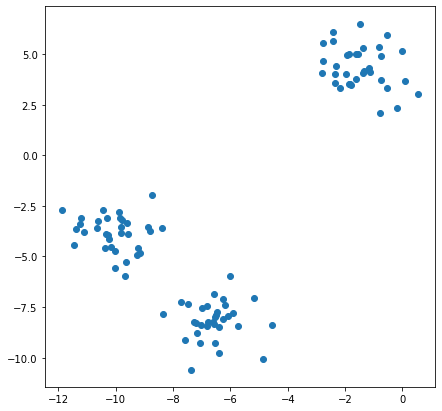

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1]);

In [12]:
def kmeans(data, k, max_iterations, min_distance):
       
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for i in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
              
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        
        for ind in range(len(centroids)):
            distance = e_metrics(centroids[ind], old_centroids[ind])
            if distance > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            print('stop:', i)
            break
    
    return old_centroids, classes

In [13]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item], alpha=0.7)
            
    plt.show()

Реализуем функцию подсчёта качества кластеризации.

In [14]:
def kmeans_metric(centroids, classes):
    result = 0
    for cls in range(len(classes)):
        for x in classes.get(cls):
            result += e_metrics(x, centroids[cls]) ** 2 #для бОльшего эффекта возведем евклидову метрику в квадрат
    return round(result, 3)

Подготовим данные для построения графика зависимости качества кластеризации от количества кластеров.

In [15]:
k_list = np.arange(1, 11)

metrics_list = []

for k in k_list:
    centroids, classes = kmeans(X, k, 5, 1e-4)
    metrics_list.append(kmeans_metric(centroids, classes))

stop: 1
stop: 1
stop: 3
stop: 3
stop: 3
stop: 3
stop: 3
stop: 4
stop: 4


Построим график зависимости.

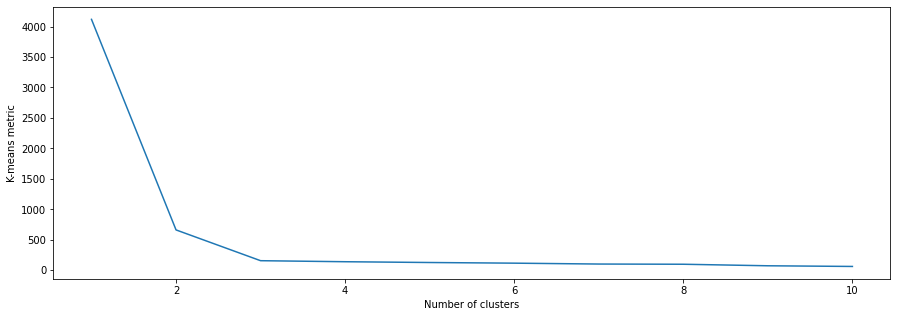

In [16]:
plt.figure(figsize=(15, 5))
plt.xlabel('Number of clusters')
plt.ylabel('K-means metric')
plt.plot(k_list, metrics_list)
plt.show()

Судя по графику наиболее оптимальное количество кластеров для текущей выборки - $3$

In [17]:
k = 3
max_iterations = 10
min_distance = 1e-4
centroids, classes = kmeans(X, k, max_iterations, min_distance)

stop: 3


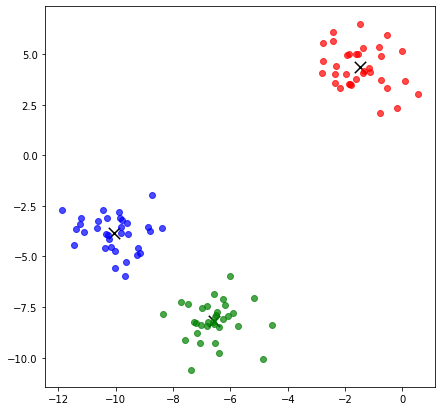

In [18]:
visualize(centroids, classes)

In [19]:
kmeans_metric(centroids, classes)

156.283